In [9]:
"""
@author: pho
"""
## Automatic debugger on exception raised
# %pdb on
%pdb off
%load_ext autoreload
%autoreload 2
import sys
import importlib
from pathlib import Path
from copy import deepcopy
from numba import jit
import numpy as np
import pandas as pd

%config Completer.use_jedi = False

# # required to enable non-blocking interaction:
%gui qt5

import os
import numpy as np
import pandas as pd
from pathlib import Path
import dill as pickle

from neuropy.utils.load_exported import LoadXml, find_session_xml # for compute_with_params_loaded_from_xml
from src.cnn.PhoRippleDetectionTesting import ExtendedRippleDetection, main_compute_with_params_loaded_from_xml

Automatic pdb calling has been turned OFF
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
local_session_parent_path = Path(r'W:\Data\KDIBA\gor01\one')
local_session_names_list = ['2006-6-07_11-26-53', '2006-6-08_14-26-15', '2006-6-09_1-22-43', '2006-6-09_3-23-37', '2006-6-12_15-55-31', '2006-6-13_14-42-6']
local_session_paths_list = [local_session_parent_path.joinpath(a_name).resolve() for a_name in local_session_names_list]

local_session_path: Path = local_session_paths_list[0]
local_session_path

WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-07_11-26-53')

In [4]:
session_xml_filepath, session_stem, local_session_path = find_session_xml(local_session_path)
out_xml_dict, d = LoadXml(session_xml_filepath)

active_shank_channels_lists = out_xml_dict['AnatGrps']
active_shank_channels_lists = [active_shank_channels_lists[i] for i in [0,1,2]]
print(f"active_shank_channels_lists: {active_shank_channels_lists}")

active_shank_channels_lists: [[0, 1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14, 15], [16, 17, 18, 19, 20, 21, 22, 23]]


## Load previously computed result

## Build and run completely new detector:

In [ ]:
test_detector = ExtendedRippleDetection(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
ripple_df, out_all_ripple_results = test_detector.compute(**({'active_session_folder': local_session_path,
     'numchannel': out_xml_dict['nChannels'], 'srLfp': out_xml_dict['lfpSampleRate'], 'active_shank_channels_lists': active_shank_channels_lists,
     'overlapping': True, 'window_size': 0.0128, 'window_stride': 0.0064}))

# out_all_ripple_results
ripple_df.to_pickle(local_session_path.joinpath('ripple_df.pkl'))
print(f'done. Exiting.')

test_detector.save()

In [5]:
in_ripple_detector_filepath = Path(r'W:\Data\KDIBA\gor01\one\2006-6-07_11-26-53\ripple_detector.pkl')
loaded_ripple_detector = ExtendedRippleDetection.load(in_ripple_detector_filepath)
loaded_ripple_detector

loading pickled ripple detector object from W:\Data\KDIBA\gor01\one\2006-6-07_11-26-53\ripple_detector.pkl...
Loading CNN model... WARNING:tensorflow:SavedModel saved prior to TF 2.5 detected when loading Keras model. Please ensure that you are saving the model with model.save() or tf.keras.models.save_model(), *NOT* tf.saved_model.save(). To confirm, there should be a file named "keras_metadata.pb" in the SavedModel directory.
Done!
done.


# Result Visualization

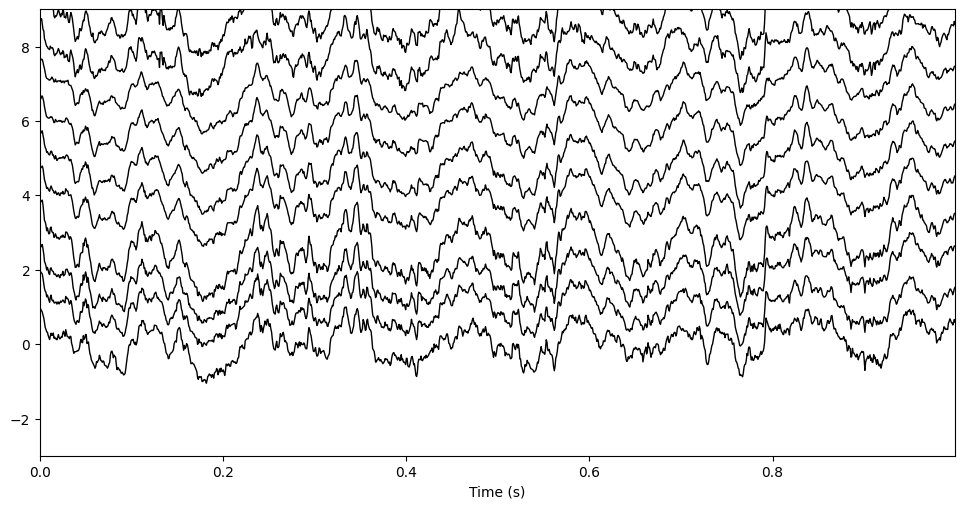

In [7]:
from src.cnn.visualizations.plot_ripples import plot_ripples

#@title Time (in seconds) { run: "auto", vertical-output: true, display-mode: "form" }
second =  0#@param {type:"integer"}

pred_indexes = loaded_ripple_detector.results[0]['pred_indexes'] # note only uses shank 0
fig, ax, plot_data = plot_ripples(loaded_ripple_detector.loaded_eeg_data, pred_indexes, second, downsampled_fs=1250)
# plot_data: {'lines':lines, 'fills':fills}

# Overflow

In [ ]:
def keys(a_dict, debug_print=True):
    out_list = list(a_dict.keys())
    if debug_print:
        print(out_list)
    return out_list

In [ ]:
test_detector, ripple_df, out_all_ripple_results, out_all_ripple_results = main_compute_with_params_loaded_from_xml(active_local_session_path)

In [ ]:
out_all_ripple_results['preprocessed_data']['data']

In [ ]:
out_all_ripple_results['computation_params']

In [ ]:
print(list(out_all_ripple_results['computation_params'].keys()))

In [ ]:
keys(out_all_ripple_results['computation_params'])
keys(out_all_ripple_results['preprocessed_data'])
keys(out_all_ripple_results['results'])

In [ ]:
from neuropy.utils.dynamic_container import DynamicContainer, override_dict, overriding_dict_with, get_dict_subset

# ['overlapping', 'window_size', 'stride', 'threshold', 'learning_rate', 'beta_1', 'beta_2', 'epsilon', 'amsgrad']
get_dict_subset(out_all_ripple_results['computation_params'], ['learning_rate', 'beta_1', 'beta_2', 'epsilon', 'amsgrad'])

In [ ]:
test_detector.save()

In [ ]:
loaded_ripple_detector.loaded_eeg_data

In [ ]:
keys(loaded_ripple_detector.results[0]['pred_indexes'])